In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline


## Splitting

In [3]:
ff = pd.read_csv('forestfires.csv')

In [67]:
from sklearn.model_selection import train_test_split

In [74]:
ff['area_size'] = ff['area'].apply(lambda x: 1 if x> 25.0 else 0)
#what should be the value that is the cutoff for area size?

In [78]:
ff.area_size.groupby(ff.area_size).count()

area_size
0    465
1     52
Name: area_size, dtype: int64

In [79]:
ff

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_size
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [105]:
df = ff[ff['area']> 0]

In [106]:
df['area'].mean()

24.60018518518518

In [112]:
df.area

138     0.36
139     0.43
140     0.47
141     0.55
142     0.61
       ...  
509     2.17
510     0.43
512     6.44
513    54.29
514    11.16
Name: area, Length: 270, dtype: float64

In [107]:
df['area_size'] = df['area'].apply(lambda x: 1 if x> 25.0 else 0)

<ipython-input-107-eb0e7bf292c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_size'] = df['area'].apply(lambda x: 1 if x> 25.0 else 0)


In [110]:
df.area_size.groupby(df.area_size).count()

area_size
0    218
1     52
Name: area_size, dtype: int64

/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: 'module' object is not callable

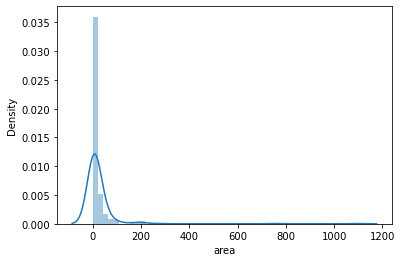

In [101]:
sns.distplot(df['area'])
fig = plt.figure()

In [ ]:
df['area_size'] = ff['area'].apply(lambda x: 1 if x> 25.0 else 0)

In [80]:
ff2 = ff[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area_size']]

In [82]:
X = np.array(ff2[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']])
y = np.array(ff2['area_size'])

In [84]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.40, random_state=42)

In [86]:
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [87]:
print(len(x_train), len(x_validate), len(x_test))

310 103 104


In [ ]:
ff.area

## Normalizing

In [40]:
#ff.area.sort_values(ascending = False)

238    1090.84
415     746.28
479     278.53
237     212.88
236     200.94
        ...   
302       0.00
300       0.00
299       0.00
298       0.00
0         0.00
Name: area, Length: 517, dtype: float64

In [41]:
#ff.area.mean()

12.847292069632491

/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: 'module' object is not callable

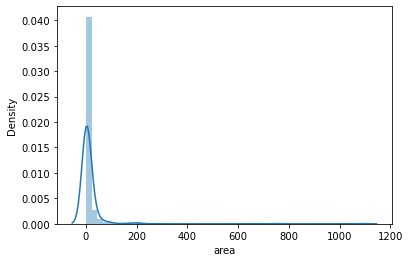

In [88]:
sns.distplot(ff['area'])
fig = plt.figure()

/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: 'module' object is not callable

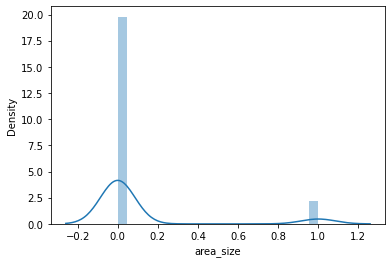

In [90]:
sns.distplot(ff['area_size'])
fig = plt.figure()
#still very much skewed to 0

### min/max scaling

In [64]:
def minmax_scaler(x):
    xmin = np.min(x)
    xmax = np.max(x)
    output = (x-xmin)/(xmax-xmin)
    return output

In [94]:
ff.FFMC = minmax_scaler(ff.FFMC)
ff.DMC = minmax_scaler(ff.DMC)
ff.DC = minmax_scaler(ff.DC)
ff.ISI = minmax_scaler(ff.ISI)
ff.temp = minmax_scaler(ff.temp)
ff.RH = minmax_scaler(ff.RH)
ff.wind = minmax_scaler(ff.wind)
ff.rain = minmax_scaler(ff.rain)
ff.area_size = minmax_scaler(ff.area_size)

In [95]:
ff

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_size
0,7,5,mar,fri,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.00,0.0
1,7,4,oct,tue,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.00,0.0
2,7,4,oct,sat,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.00,0.0
3,8,6,mar,fri,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.00,0.0
4,8,6,mar,sun,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,6.44,0.0
513,2,4,aug,sun,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,54.29,1.0
514,7,4,aug,sun,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,11.16,0.0
515,1,4,aug,sat,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.00,0.0


In [61]:
#ff["area_norm"]= (1+ff["area"])/2
#ff["area_log"] = np.log(ff["area_norm"])

In [72]:
#ff = ff.drop(["area_log", "area_norm"], axis=1)

/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: 'module' object is not callable

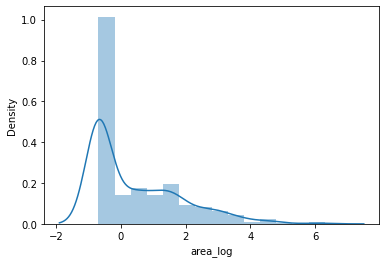

In [63]:
sns.distplot(ff['area_log'])
fig = plt.figure()

In [43]:
areanotzero = ff[ff["area"] != 0.00].mean()
areanotzero

X         4.807407
Y         4.366667
FFMC     91.034074
DMC     114.707778
DC      570.867037
ISI       9.177037
temp     19.311111
RH       43.733333
wind      4.112963
rain      0.028889
area     24.600185
dtype: float64

## Exploratory Analysis

In [44]:
#ff.describe()

In [14]:
ff.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
431,1,3,aug,sat,92.1,178.0,605.3,9.6,23.3,40,4.0,0.0,6.36
411,7,4,feb,fri,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62
201,6,5,mar,sun,90.1,37.6,83.7,7.2,12.4,54,3.6,0.0,12.10
74,5,4,sep,fri,93.3,141.2,713.9,13.9,27.6,30,1.3,0.0,0.00
401,3,4,sep,thu,91.1,88.2,731.7,8.3,22.8,46,4.0,0.0,4.95


In [16]:
month = ff.month.value_counts()
month

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

<AxesSubplot:>

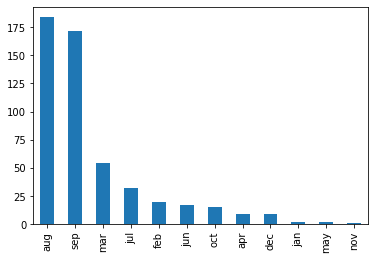

In [35]:
month.plot.bar()
#august and september have significantly more forest fires

In [17]:
day = ff.day.value_counts()
day

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [19]:
ffcorr = ff.corr()

<AxesSubplot:>

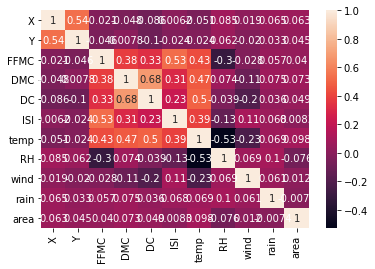

In [22]:
sns.heatmap(ffcorr, annot=True)

In [1]:
def minmax_scaler(x):
    xmin = np.min(x)
    xmax = np.max(x)
    output = (x-xmin)/(xmax-xmin)
    return output

In [ ]:
x_train_scaled = minmax_scaler(x_train)
y_train_scaled = minmax_scaler(y_train)
y_validate_scaled = minmax_scaler(y_validate)
x_validate_scaled = minmax_scaler(x_validate)

x_train2_scaled = minmax_scaler(x_train2)

## Splitting data